<a href="https://colab.research.google.com/github/letteredMelody/colab_python/blob/main/Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Знакомство с библиотеками для анализа данных. NumPy

Результат лабораторной работы − отчет в формате ноутбука Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### О задании

Лабораторные работы "NumPy" и "Pandas" направлены на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач (да, алгебры и геометрии тут почти нет). В данных заданиях разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью заданий является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в заданиях функции.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо добавить ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировками
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Знакомство с Numpy

Во всех заданиях данного ноутбука **запрещено** использовать циклы (ключевые слова *for* и *while*), [list comprehension](https://habrahabr.ru/post/30232/), [map и т.п.](http://pythonicway.com/python-functinal-programming)

Для каждой задачи приведите примеры использования реализованных функций. Без примеров баллы за задание будут снижены в 2 раза, примеры должны отличаться от тех что приведены в самом задании

Под матрицей в заданиях понимается двумерный [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

In [ ]:
import numpy as np

**(0.25 балла) Задание 1.** Реализуйте функцию, принимающую на вход матрицу ```X``` и два массива индексов ```indices1``` и ```indices2``` одинаковой длины и возвращающую np.array, состоящий из последовательности элементов 

```[X[indices1[0], indices2[0]], ... , X[indices1[N-1], indices2[N-1]]]```

In [ ]:
def construct_array(X, indices1, indices2):
    return np.array(X[indices1, indices2])


assert np.allclose (construct_array(np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]]), [1, 2, 3], [2, 1, 0]), np.array([6,8, 10]))

Данная функция может быть использована для получения информации о смежности вершин через матрицу.

На вход подаётся матрица смежности: 

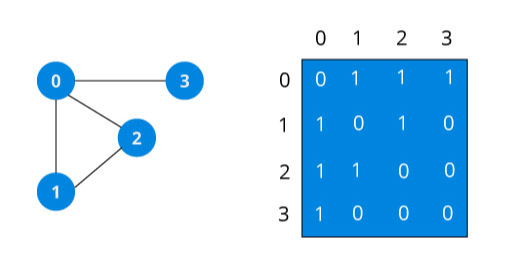

Нам хочется узнать, являются ли вершины 3 и 2 смежными, являются ли вершины 2 и 0 смежными и являются ли смежными вершины 0 и 3. 
Поэтому, подаём два массива индексов: массив "кто?" и массив "с кем?"
Проще говоря, сначала подаётся номер строки матрицы смежности, а потом номер столбца.

Функция вернёт 0 (False) или 1 (True)

In [ ]:
assert np.allclose(construct_array(np.array([[0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0], [1, 0, 0, 0]]), [3, 2, 0], [2, 0, 3]), np.array([0, 1, 1]))

**(0.25 балла) Задача 2.** Реализуйте функцию, которая на вход принимает два массива ```X``` и ```Y``` (массивы могут быть n-мерные, но их размерности должны совпадать), а возвращает **True** если они равны и **False** - иначе.

In [ ]:
def detect_identic(X, Y):
    return np.array_equal(X, Y)


assert np.allclose (detect_identic(np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]]), np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 11]])), False)
assert np.allclose (detect_identic(np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]]), np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])), True)

*Функция взята [отсюда](https://https://ru.stackoverflow.com/questions/500358/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B4%D0%B2%D1%83%D1%85-%D0%BC%D0%B0%D1%81%D1%81%D0%B8%D0%B2%D0%BE%D0%B2-%D0%B2-pythonnumpy).*

**Пример использования:**

Если мы работаем с проверкой какой-то крупной контрольной работы, или же сравниваем реальные и ожидаемые результаты какого-то измерения, удобно сравнивать массивы данных не вручную и не посимвольно, а с помощью функции, которая ускоряет работу программы.

Предположим, что мы проверяем контрольную с множественным выбором в каждом задании, каждый элемент массива содержит массив правильных ответов. Первый массив содержит правильные ответы, а второй - ответы ученика.

In [ ]:
assert np.allclose (detect_identic(np.array([['A', 'C', 'E'], ['D', 'E', 'F'], ['A', 'D', 'F'], ['C', 'D', 'E']]), np.array([['A' ,'C' ,'E'], ['D', 'E', 'F'], ['A', 'D', 'F'], ['C', 'D', 'E']])), True)

**(0.25 балла) Задание 3.** Реализуйте функцию, которая на вход принимает цветное изображение ```X``` (трехмерный вектор размера (n, m, 3)) и возвращает среднее значение по трём каналам (вектор длины 3).

In [ ]:
def mean_channel(X):
    # Your code here


assert np.allclose (mean_channel(np.arange(27).reshape((3, 3, 3))), np.array([12., 13., 14.]))

**(0.25 балла) Задание 4. ** Реализуйте функцию, принимающую на вход матрицу ```X``` и некоторое число ```a``` и возвращающую ближайший к числу элемент матрицы.

Например, для ```X = np.arange(0,10).reshape((2, 5))``` и ```a = 3.6``` ответом будет 4.

In [ ]:
def nearest_value(X, a):
    # Your code here


assert np.allclose (nearest_value(np.arange(0,1000).reshape((10, 10, 10)), -1), 0)
assert np.allclose (nearest_value(np.arange(0,1000).reshape((10, 10, 10)), 160.5), 160)
assert np.allclose (nearest_value(np.arange(0,1000).reshape((10, 10, 10)), 160.6), 161)

**(0.5 балла) Задача 5.** Реализуйте функцию, принимающую на вход два одномерных массива ```x``` и ```y``` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй - второму.

В этом задании **запрещается** пользоваться операцией транспонирования и рекомедуется воспользоваться методом [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

In [ ]:
def construct_matrix(x, y):
    # Your code here

    
assert np.allclose (construct_matrix(np.arange(0, 6), np.arange(6, 12)), np.array([[0, 6], [1, 7], [2, 8], [3, 9], [4, 10], [5, 11]]))

**(0.5 балла) Задание 6.** Реализуйте функцию, которая на вход принимает вектор ```x```, содержащий целые числа, кроме 0, а возвращает вектор со вставленными нулями между числами.

Например, из ```[1, -5, 3]``` получить ```[1, 0, -5, 0, 3]```

In [ ]:
def add_zeros(x):
    # Your code here    


assert np.allclose (add_zeros(np.arange(1, 10)), np.array([1., 0., 2., 0., 3., 0., 4., 0., 5., 0., 6., 0., 7., 0., 8., 0., 9.]))
assert np.allclose (add_zeros(np.array([1])), np.array([1]))
assert np.allclose (add_zeros(np.array([])), np.array([]))

**(0.75 балла) Задание 7.** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы

Например, для ```X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])``` ответом является 3. Если ненулевых элементов нет, функция должна возвращать ```None```.

In [ ]:
def nonzero_product(X):
    # Your code here


assert np.allclose (nonzero_product(np.array([[3, 3, 3], [5, 5, 5], [7, 7, 0]])), 15)
assert nonzero_product(np.array([[0, 3, 3], [5, 0, 5], [7, 7, 0]])) == None

**(0.75 балла) Задание 8.** Реализуйте функцию, возвращающую максимальный элемент в массиве ```X``` среди элементов, перед которыми стоит нулевой.

Например, для ```X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])``` ответом является 5. Если подходящих элементов нет, функция должна возвращать ```None```.

In [ ]:
def max_element(X):
    # Your code here


assert max_element(np.array([1,2,3,4,5])) == None
assert max_element(np.array([1,0,0,0,0])) == None
assert np.allclose(max_element(np.array([1,0,3,2,0])), 3)

**(0.75 балла) Задание 9.** Реализуйте функцию, принимающую на вход матрицу ```X``` и возвращающую все её уникальные строки в виде матрицы.

In [ ]:
def get_unique_rows(X):
    # Your code here


assert np.allclose (get_unique_rows(np.array([[1, 2], [1, 9], [1, 2],[1, 9]])), np.array([[1, 2], [1, 9]]))
assert np.allclose (get_unique_rows(np.zeros((10,10))), np.zeros(10))

**(0.75 балла) Задача 10.** Реализуйте функцию, которая во входной вещественной матрице ```X``` находит все значения ```nan``` и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы ```nan```, то верните нулевую матрицу той же размерности.

In [ ]:
def replace_nans(X):
    # Your code here


assert np.allclose (replace_nans(np.array([np.nan, np.nan])), np.zeros(2))
assert np.allclose (replace_nans(np.array([[2, np.nan], [np.nan, 3]])), np.array([[2., 2.5], [2.5, 3.]]))

**(1 балл) Задача 11.** Напишите функцию, генерирующую [матрицу Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принимающую на вход вектор $(x_1, ... , x_n)$.

В этом задании **запрещается** пользоваться готовыми реализациями (например, [numpy.vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html)), а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решении задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html).

In [ ]:
def vander(x):
    # Your code here


assert np.allclose (np.vander(np.array([]), increasing=True), vander(np.array([])))
assert np.allclose (np.vander(np.array([1, 2, 3, 5]), increasing=True), vander(np.array([1, 2, 3, 5])))

**(1 балл) Задача 12.** Даны две вещественные матрицы ```X``` и ```Y``` с одинаковым числом столбцов и, в общем случае, различным числом строк. Необходимо реализовать функцию, вычисляющую матрицу попарных [косинусных коэффициентов](https://en.wikipedia.org/wiki/Cosine_similarity) между всеми $X_i$ и $Y_j$, где $X_i$ - $i$-ая строка матрицы $X$, а $Y_j$ - $j$-ая строка матрицы $Y$. 

В этом задании **запрещается** пользоваться готовыми реализациями, а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решении задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html), [np.sqrt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) и [np.power](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html).

In [ ]:
def count_cosine_similarity(X, Y):
    # Your code here


assert np.allclose (count_cosine_similarity(np.array([[1, 2], [4, 8], [1, 2]]), np.array([[1, 2], [4, 2]])), np.array([[1, 0.8], [1, 0.8], [1, 0.8]]))
assert np.allclose (count_cosine_similarity(np.ones((10, 5)), np.ones((3, 5))), np.ones((10, 3)))